In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
%matplotlib inline

#Hartree atomic units decloration
h=1
el=1
a_0=1
m_e=1
E_h = 27.2 #[ev]

In [2]:
def Hamilton_matrix(a, V_vector, n):
    d = a*np.ones(n) + V_vector
    e = (-a/2)*np.ones(n-1)
    w, v = eigh_tridiagonal(d, e)
    H = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
    return H, w, v.T

In [3]:
def Boundry_problem_numcalc(V_vector, dx, n):
    a = h**2 / (m_e*dx**2)
    return Hamilton_matrix(a, V_vector, n)

In [4]:
def normalization(Y_vectors, indexes):
    Y_vectors_normalized = []
    for i in indexes:
        y_sum = 0
        for m in Y_vectors[i]:
            y_sum += (np.abs(m))**2
        a = 1/(np.sqrt(y_sum*dx))
        Y_vectors_normalized.append(Y_vectors[i]*a)
    return Y_vectors_normalized

C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0, flags=flags)


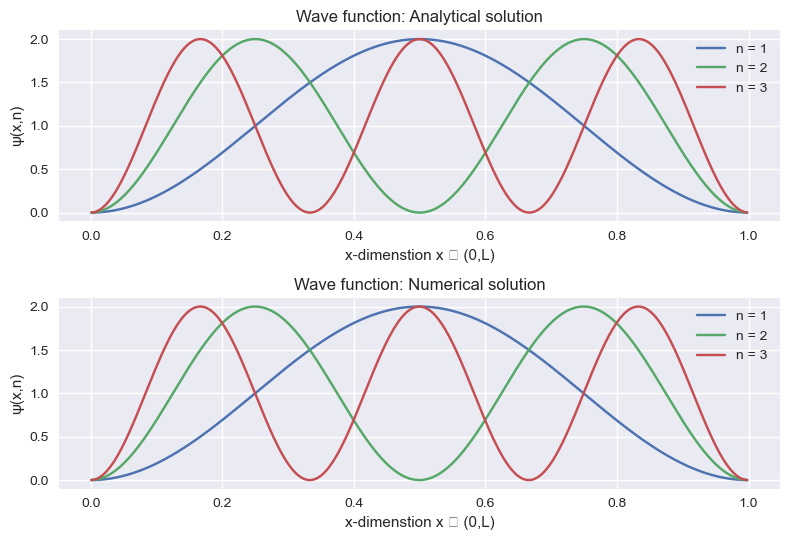

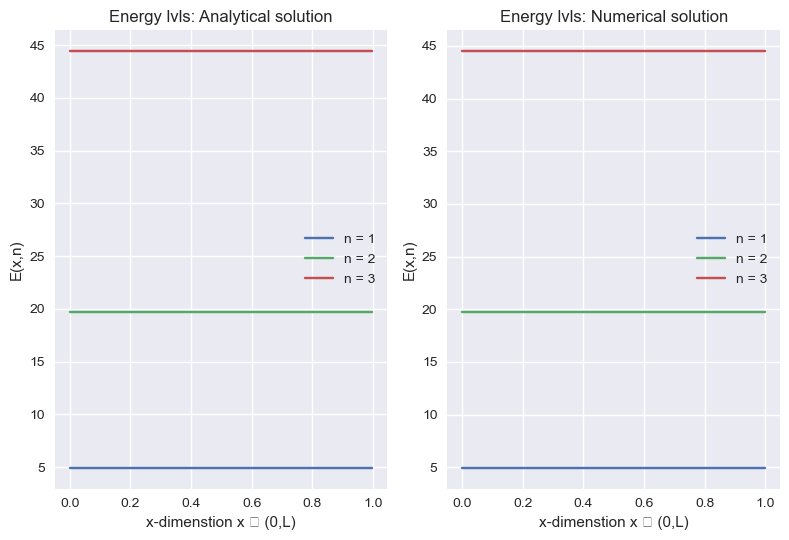

In [5]:
#PROBLEM 1
dx = 0.001
L = 1
x_1 = 0+dx
x_n = L-dx
x_N = L
N = int(((x_N-0)/dx)-2)

x_vals = np.arange(x_1, x_n, dx)

V_vector = np.zeros(N)

def Y(x, i):
    return np.sqrt(2/L)*np.sin(i*np.pi*x/L)

def E(i):
    return (i**2*np.pi**2*h**2) / (2*m_e*L**2)

#analytical
i = 1
Y_vals_1 = []
for x in x_vals:
    Y_vals_1 = np.append(Y_vals_1,Y(x, i))
E_vals_1 = np.ones(N)*E(i)
i = 2
Y_vals_2 = []
for x in x_vals:
    Y_vals_2 = np.append(Y_vals_2,Y(x, i))
E_vals_2 = np.ones(N)*E(i)
i = 3
Y_vals_3 = []
for x in x_vals:
    Y_vals_3 = np.append(Y_vals_3,Y(x, i))
E_vals_3 = np.ones(N)*E(i)

#numerical
H, E_vals, Y_vectors = Boundry_problem_numcalc(V_vector, dx, N)
Y_vectors_normalized = normalization(Y_vectors, [0, 1, 2])

#visualisation
plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 100
fig1, (ax1, ax3) = plt.subplots(nrows = 2, ncols = 1)
fig2, (ax2, ax4) = plt.subplots(nrows = 1, ncols = 2)

ax1.plot(x_vals, (np.abs(Y_vals_1))**2, label = "n = 1")
ax1.plot(x_vals, (np.abs(Y_vals_2))**2, label = "n = 2")
ax1.plot(x_vals, (np.abs(Y_vals_3))**2, label = "n = 3")
ax1.set_title("Wave function: Analytical solution")
ax1.set_xlabel("x-dimenstion x ∈ (0,L)")
ax1.set_ylabel("ψ(x,n)")
ax1.legend()

ax2.plot(x_vals, E_vals_1, label = "n = 1")
ax2.plot(x_vals, E_vals_2, label = "n = 2")
ax2.plot(x_vals, E_vals_3, label = "n = 3")
ax2.set_title("Energy lvls: Analytical solution")
ax2.set_xlabel("x-dimenstion x ∈ (0,L)")
ax2.set_ylabel("E(x,n)")
ax2.legend()

ax3.plot(x_vals, (np.abs(Y_vectors_normalized[0]))**2, label = "n = 1")
ax3.plot(x_vals, (np.abs(Y_vectors_normalized[1]))**2, label = "n = 2")
ax3.plot(x_vals, (np.abs(Y_vectors_normalized[2]))**2, label = "n = 3")
ax3.set_title("Wave function: Numerical solution")
ax3.set_xlabel("x-dimenstion x ∈ (0,L)")
ax3.set_ylabel("ψ(x,n)")
ax3.legend()

ax4.plot(x_vals, E_vals[0]*np.ones(N), label = "n = 1")
ax4.plot(x_vals, E_vals[1]*np.ones(N), label = "n = 2")
ax4.plot(x_vals, E_vals[2]*np.ones(N), label = "n = 3")
ax4.set_title("Energy lvls: Numerical solution")
ax4.set_xlabel("x-dimenstion x ∈ (0,L)")
ax4.set_ylabel("E(x,n)")
ax4.legend()

fig1.tight_layout()
fig2.tight_layout()
plt.show()

C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0, flags=flags)


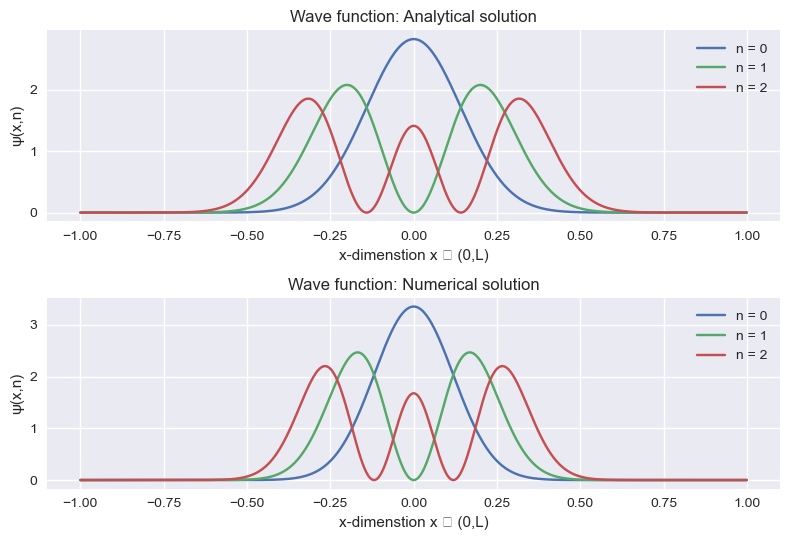

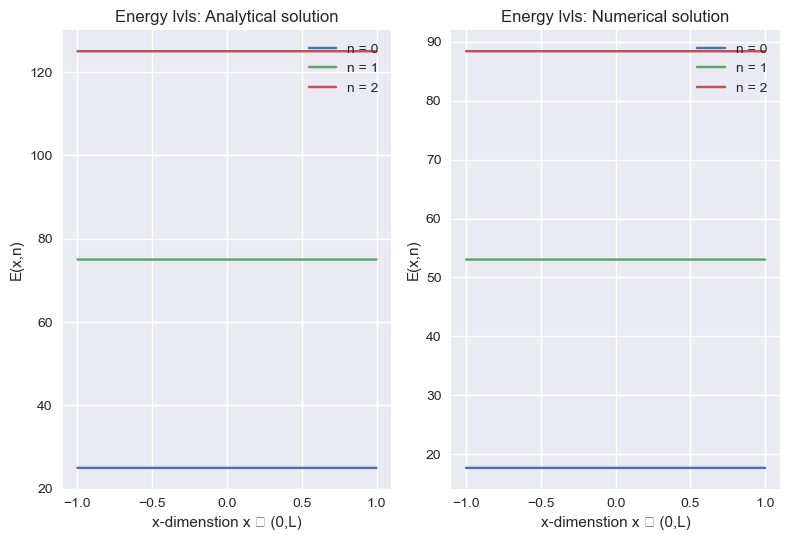

In [6]:
#PROBLEM 2
dx = 0.001
L = 1
N = int(2*L/dx)
m_new = m_e**2/2*m_e
omega = 50

x_vals = np.arange(-L, L, dx)

def Hermit(x, i):
    rforms = [1, 2*np.sqrt(m_new*omega/h)*x, 4*(np.sqrt(m_new*omega/h)*x)**2-2, 8*(np.sqrt(m_new*omega/h)*x)**3-12*(np.sqrt(m_new*omega/h)*x)]
    return rforms[i]

def Y(x, i):
    return (1/np.sqrt(2**i*np.math.factorial(i)))*(m_new*omega/(np.pi*h))**(1/4)*np.exp(-m_new*omega*x**2/(2*h))*Hermit(x, i)

def E(i):
    return (i+1/2)*h*omega

#analytical
i = 0
Y_vals_1 = []
for x in x_vals:
    Y_vals_1 = np.append(Y_vals_1,Y(x, i))
E_vals_1 = np.ones(N)*E(i)
i = 1
Y_vals_2 = []
for x in x_vals:
    Y_vals_2 = np.append(Y_vals_2,Y(x, i))
E_vals_2 = np.ones(N)*E(i)
i = 2
Y_vals_3 = []
for x in x_vals:
    Y_vals_3 = np.append(Y_vals_3,Y(x, i))
E_vals_3 = np.ones(N)*E(i)

#numerical
def Potential(x):
    return (m_new*omega**2*x**2)/2
V_vector = []
for x in x_vals:
    V_vector = np.append(V_vector, Potential(x))

H, E_vals, Y_vectors = Boundry_problem_numcalc(V_vector, dx, N)
Y_vectors_normalized = normalization(Y_vectors, [0, 1, 2])

#visualisation
plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 100
fig3, (ax1, ax3) = plt.subplots(nrows = 2, ncols = 1)
fig4, (ax2, ax4) = plt.subplots(nrows = 1, ncols = 2)

ax1.plot(x_vals, (np.abs(Y_vals_1))**2, label = "n = 0")
ax1.plot(x_vals, (np.abs(Y_vals_2))**2, label = "n = 1")
ax1.plot(x_vals, (np.abs(Y_vals_3))**2, label = "n = 2")
ax1.set_title("Wave function: Analytical solution")
ax1.set_xlabel("x-dimenstion x ∈ (0,L)")
ax1.set_ylabel("ψ(x,n)")
ax1.legend()

ax2.plot(x_vals, E_vals_1, label = "n = 0")
ax2.plot(x_vals, E_vals_2, label = "n = 1")
ax2.plot(x_vals, E_vals_3, label = "n = 2")
ax2.set_title("Energy lvls: Analytical solution")
ax2.set_xlabel("x-dimenstion x ∈ (0,L)")
ax2.set_ylabel("E(x,n)")
ax2.legend()

ax3.plot(x_vals, (np.abs(Y_vectors_normalized[0]))**2, label = "n = 0")
ax3.plot(x_vals, (np.abs(Y_vectors_normalized[1]))**2, label = "n = 1")
ax3.plot(x_vals, (np.abs(Y_vectors_normalized[2]))**2, label = "n = 2")
ax3.set_title("Wave function: Numerical solution")
ax3.set_xlabel("x-dimenstion x ∈ (0,L)")
ax3.set_ylabel("ψ(x,n)")
ax3.legend()

ax4.plot(x_vals, E_vals[0]*np.ones(N), label = "n = 0")
ax4.plot(x_vals, E_vals[1]*np.ones(N), label = "n = 1")
ax4.plot(x_vals, E_vals[2]*np.ones(N), label = "n = 2")
ax4.set_title("Energy lvls: Numerical solution")
ax4.set_xlabel("x-dimenstion x ∈ (0,L)")
ax4.set_ylabel("E(x,n)")
ax4.legend()

fig3.tight_layout()
fig4.tight_layout()
plt.show()

C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0, flags=flags)


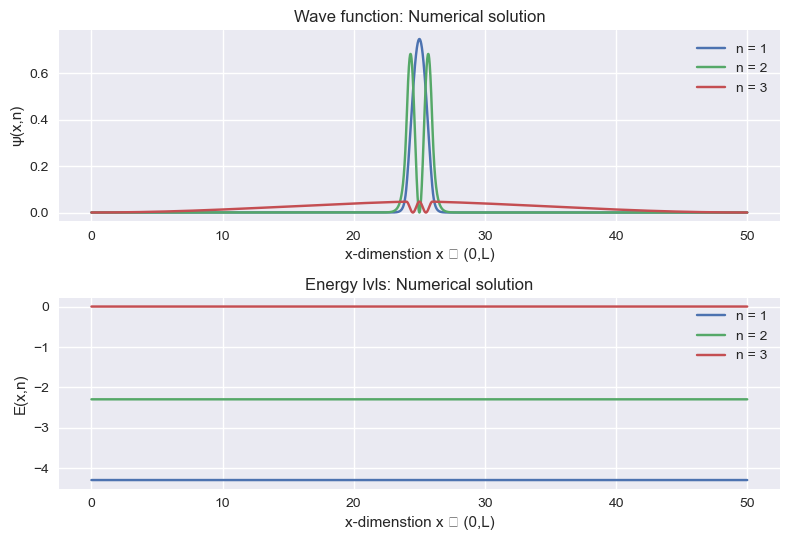

In [7]:
#PROBLEM 3
dx = 0.01
L = 50
x_vals = np.arange(0, L, dx)
N = len(x_vals)

V_0 = -5
b_w = 2  #well width
b_0 =  L/2 - b_w/2
b_1 = L/2 + b_w/2
V_vector = []
for x in x_vals:
    if x <= b_0 or x >= b_1:
        V_vector.append(0)
    elif x > b_0 or x <= b_1:
        V_vector.append(V_0)

H, E_vals, Y_vectors = Boundry_problem_numcalc(V_vector, dx, N)
Y_vectors_normalized = normalization(Y_vectors, [0, 1, 2])

#visualisation
plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 100
fig5, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

ax1.plot(x_vals, (np.abs(Y_vectors_normalized[0]))**2, label = "n = 1")
ax1.plot(x_vals, (np.abs(Y_vectors_normalized[1]))**2, label = "n = 2")
ax1.plot(x_vals, (np.abs(Y_vectors_normalized[2]))**2, label = "n = 3")
ax1.set_title("Wave function: Numerical solution")
ax1.set_xlabel("x-dimenstion x ∈ (0,L)")
ax1.set_ylabel("ψ(x,n)")
ax1.legend()

ax2.plot(x_vals, E_vals[0]*np.ones(N), label = "n = 1")
ax2.plot(x_vals, E_vals[1]*np.ones(N), label = "n = 2")
ax2.plot(x_vals, E_vals[2]*np.ones(N), label = "n = 3")
ax2.set_title("Energy lvls: Numerical solution")
ax2.set_xlabel("x-dimenstion x ∈ (0,L)")
ax2.set_ylabel("E(x,n)")
ax2.legend()

fig5.tight_layout()
plt.show()

C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0.0, flags=flags)


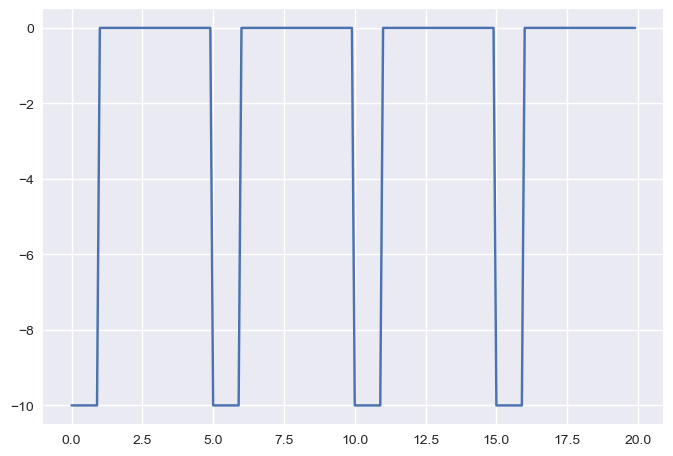

C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alexa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0, flags=flags)


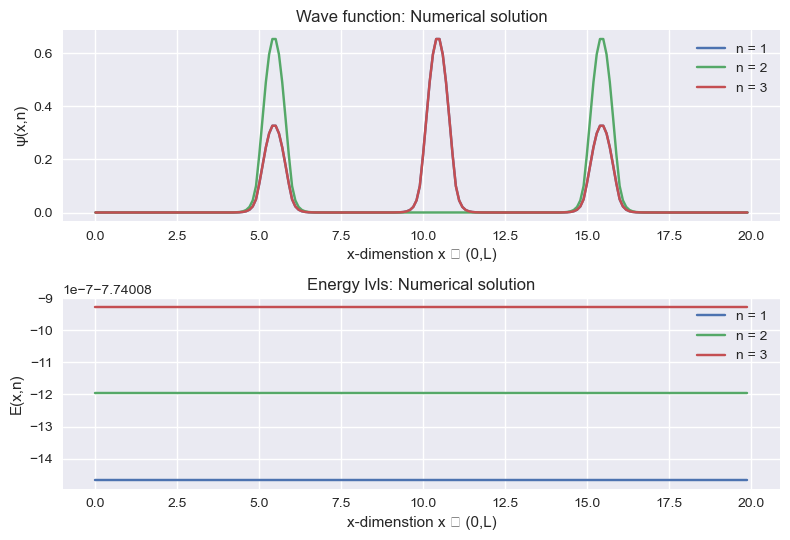

In [8]:
#PROBLEM 4
dx = 0.1
L = 20
x_vals = np.arange(0, L+dx, dx)
N = len(x_vals)
V_0 = -10 #well potential

b_w = 1  #well width
g = 4 #distance between wells

V_vector = []  
z = 0
while z <= L/dx:
    i = 0
    while i < (b_w/dx):
        if z > L/dx:
            break
        V_vector.append(V_0)
        i += 1 
        z += 1 
    i = 0
    while i < (g)/dx:
        if z > L/dx:
            break
        V_vector.append(0)
        i += 1
        z += 1

x_vals = np.delete(x_vals, -1)
V_vector = np.delete(V_vector, -1)
N -= 1



plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 100
fig6, (ax1) = plt.subplots(nrows = 1, ncols = 1)

ax1.plot(x_vals, V_vector, label = "n = 1")
fig5.tight_layout()
plt.show()

H, E_vals, Y_vectors = Boundry_problem_numcalc(V_vector, dx, N)
Y_vectors_normalized = normalization(Y_vectors, [0, 1, 2])

#visualisation
plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 100
fig7, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

ax1.plot(x_vals, (np.abs(Y_vectors_normalized[0]))**2, label = "n = 1")
ax1.plot(x_vals, (np.abs(Y_vectors_normalized[1]))**2, label = "n = 2")
ax1.plot(x_vals, (np.abs(Y_vectors_normalized[2]))**2, label = "n = 3")
ax1.set_title("Wave function: Numerical solution")
ax1.set_xlabel("x-dimenstion x ∈ (0,L)")
ax1.set_ylabel("ψ(x,n)")
ax1.legend()

ax2.plot(x_vals, E_vals[0]*np.ones(N), label = "n = 1")
ax2.plot(x_vals, E_vals[1]*np.ones(N), label = "n = 2")
ax2.plot(x_vals, E_vals[2]*np.ones(N), label = "n = 3")
ax2.set_title("Energy lvls: Numerical solution")
ax2.set_xlabel("x-dimenstion x ∈ (0,L)")
ax2.set_ylabel("E(x,n)")
ax2.legend()

fig7.tight_layout()
plt.show()